<a href="https://colab.research.google.com/github/Aboubacar2012/Data_Analysis_Project/blob/main/Uber_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

#####Load & Collect your entire data..

In [3]:
# import os 
import os 

In [4]:
os.listdir(r'/content/drive/MyDrive/ml_data/Data_Analysis/Project_1 Uber New York Data analysis /uber-pickups-in-new-york-city')

['Uber-Jan-Feb-FOIL.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-American_B01362.csv',
 'other-Diplo_B01196.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Firstclass_B01536.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Skyline_B00111.csv',
 'other-Prestige_B01338.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [5]:
# Let's say we want have the last 7 seven dataset 
os.listdir(r'/content/drive/MyDrive/ml_data/Data_Analysis/Project_1 Uber New York Data analysis /uber-pickups-in-new-york-city')[-7:]

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [6]:
files=os.listdir(r'/content/drive/MyDrive/ml_data/Data_Analysis/Project_1 Uber New York Data analysis /uber-pickups-in-new-york-city')[-7:]

In [7]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [8]:
# Let's remove uber-raw-data-janjuney15.csv
files.remove('uber-raw-data-janjune-15.csv')

In [9]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [11]:
# Let's read, define concat our dataset
path=r'/content/drive/MyDrive/ml_data/Data_Analysis/Project_1 Uber New York Data analysis /uber-pickups-in-new-york-city' 
final=pd.DataFrame()
for file in files:
  df=pd.read_csv(path+"/"+file, encoding='utf-8')
  final=pd.concat([df, final])

In [12]:
final.shape

(4534327, 4)

In [13]:
final.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


##### Prepare our data for analysis

In [14]:
df=final.copy()

In [15]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [16]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [18]:
df['Date/Time']=pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M:%S')

In [19]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [20]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [ ]:
# Let's extract weekday, day, minute, month, hour

In [22]:
df['weekday']=df['Date/Time'].dt.day_name()

In [23]:
df['day']=df['Date/Time'].dt.day

In [24]:
df['minute']=df['Date/Time'].dt.minute
df['month']=df['Date/Time'].dt.month
df['hour']=df['Date/Time'].dt.hour

In [25]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0


In [26]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
weekday              object
day                   int64
minute                int64
month                 int64
hour                  int64
dtype: object

In [27]:
df['weekday'].value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: weekday, dtype: int64

In [32]:
df['weekday'].value_counts().index

Index(['Thursday', 'Friday', 'Wednesday', 'Tuesday', 'Saturday', 'Monday',
       'Sunday'],
      dtype='object')

In [30]:
# let's plot this weekday

In [31]:
import plotly.express as px 

In [33]:
px.bar(x=df['weekday'].value_counts().index,
       y=df['weekday'].value_counts())

In [34]:
### Analysis by hour 

(array([216928., 103517., 227152., 543565., 324851., 366329., 819491.,
        660869., 579117., 692508.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

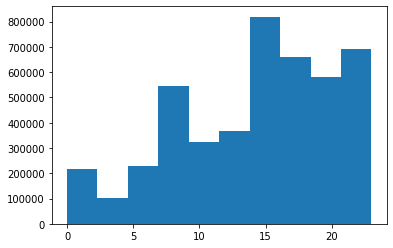

In [35]:
plt.hist(df['hour'])

In [36]:
# Analysis by month (each every month)
df['month'].unique()

array([9, 5, 6, 7, 8, 4])

In [37]:
for i, month in enumerate(df['month'].unique()):
  print(i)
  print(month)

0
9
1
5
2
6
3
7
4
8
5
4


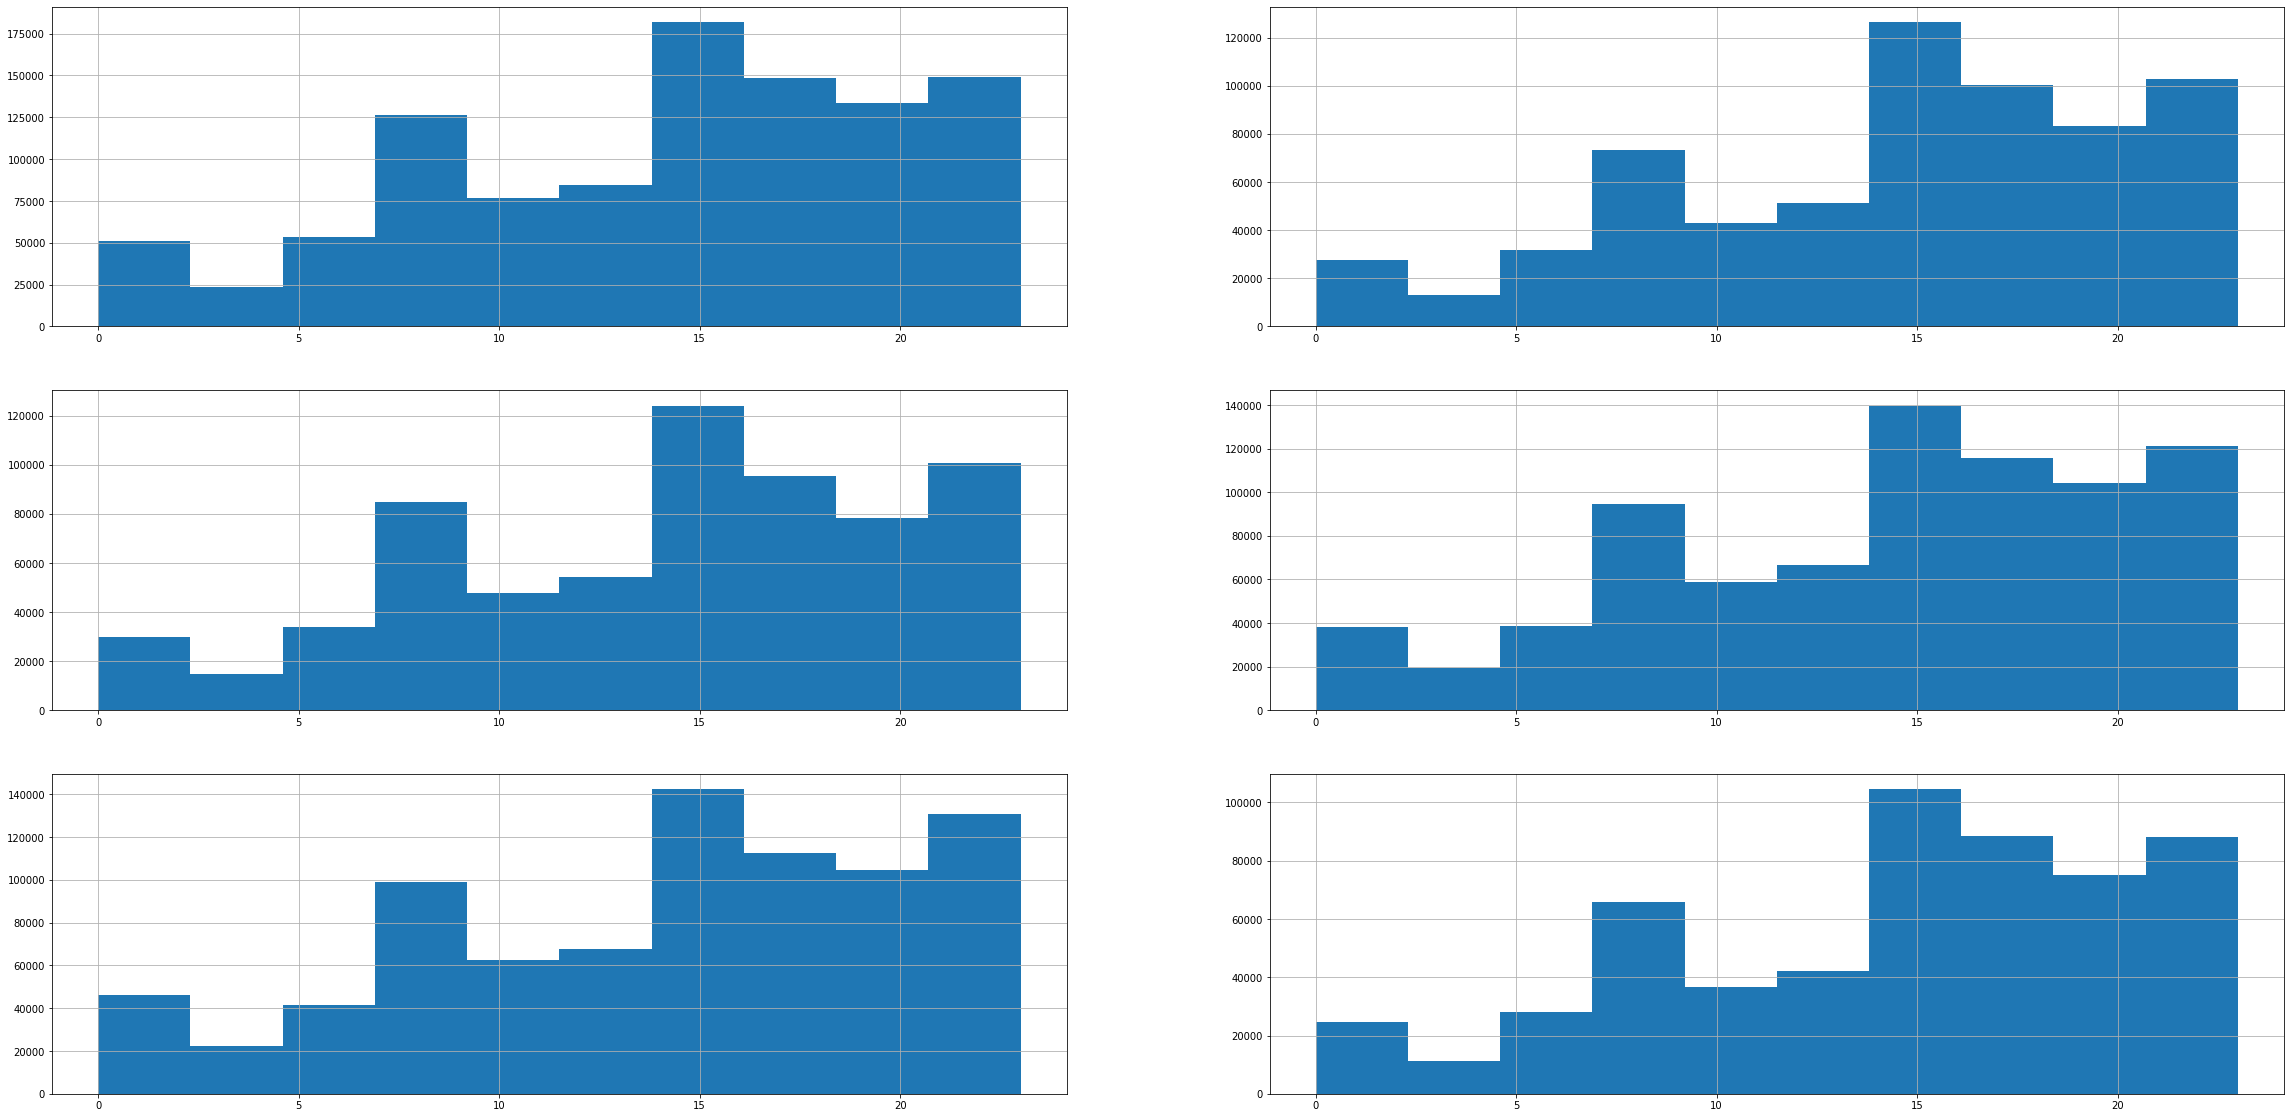

In [41]:
import warnings 
warnings.filterwarnings('ignore')
plt.figure(figsize=(40,20))
for i, month in enumerate(df['month'].unique()):
  plt.subplot(3,2, i+1)
  df[df['month']==month]['hour'].hist()